<a href="https://colab.research.google.com/github/nischalbharathraj/employee_attrition-/blob/main/employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib scikit-learn pandas


In [3]:
import pandas as pd

# Load the dataset (ensure you've uploaded the CSV file)


# Load dataset into pandas DataFrame
hr_data = pd.read_csv('/content/contentemployee_attrition_data.csv.csv.')

# List of features and the target variable
features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
            'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
            'OverTime']

target = 'Attrition'  # Target variable for prediction

# Separate features (X) and target (y)
X = hr_data[features]
y = hr_data[target]



We are doing the train test split and finding the missing values

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
# Separate categorical and numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = [col for col in X.columns if col not in num_cols]

# Numerical imputation using mean
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Categorical imputation using the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])


Lable encoding and converting them into categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

le = LabelEncoder()
for var in cat_vars:
    X_train[var] = le.fit_transform(X_train[var])
    X_test[var] = le.transform(X_test[var])


random forest mechanism

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = clf.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Display classification report and confusion matrix
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

print('\nRandom Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.87

Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294


Random Forest Confusion Matrix:
[[253   2]
 [ 35   4]]


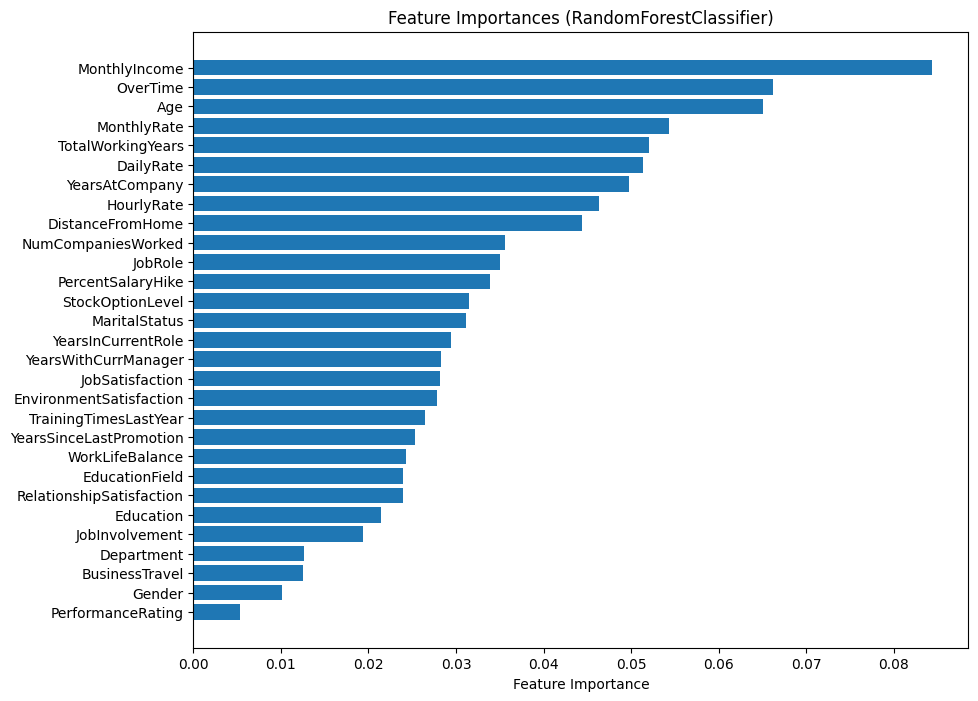

In [7]:
import matplotlib.pyplot as plt

# Feature importance plot for Random Forest
feature_importances = clf.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (RandomForestClassifier)')
plt.show()


KNN- classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Train K-NN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy for K-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-NN Accuracy: {accuracy_knn:.2f}')

# Display classification report and confusion matrix for K-NN
print('\nK-NN Classification Report:')
print(classification_report(y_test, y_pred_knn))

print('\nK-NN Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))


K-NN Accuracy: 0.85

K-NN Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.96      0.92       255
         Yes       0.31      0.13      0.18        39

    accuracy                           0.85       294
   macro avg       0.60      0.54      0.55       294
weighted avg       0.80      0.85      0.82       294


K-NN Confusion Matrix:
[[244  11]
 [ 34   5]]


we can observe that the random forest has > accuracy than knn

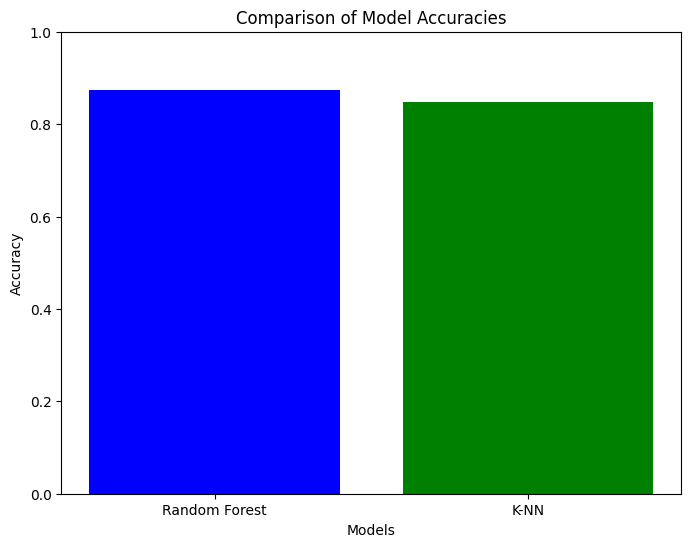

In [9]:
# Compare Random Forest and K-NN accuracies
models = ['Random Forest', 'K-NN']
accuracies = [accuracy_rf, accuracy_knn]

# Plot comparison bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim([0, 1])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


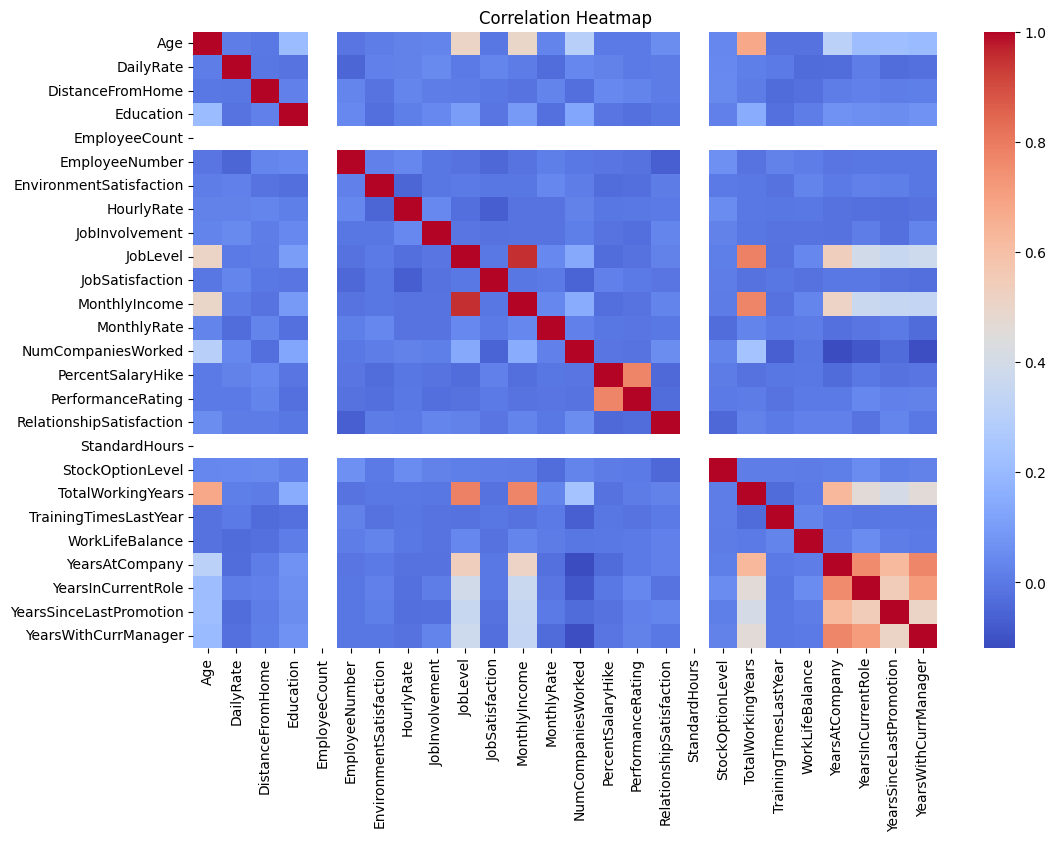

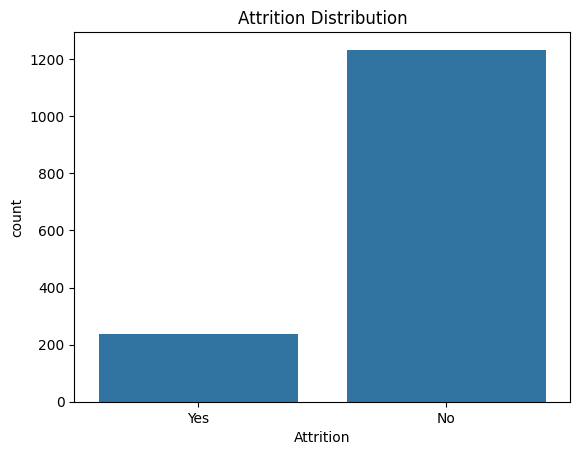

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove non-numerical columns
numerical_data = hr_data.select_dtypes(include=['float64', 'int64'])

# Drop rows with NaN values to avoid issues in heatmap calculation
numerical_data = numerical_data.dropna()

# Correlation heatmap for numerical features (without annotations)
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualize Attrition distribution across key features
sns.countplot(x='Attrition', data=hr_data)
plt.title('Attrition Distribution')
plt.show()


hyperparameter tunning


In [14]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best score: {grid_search_rf.best_score_}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.85969347277317


<ipython-input-17-3e82eb4230a5>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numeric = y_test.replace({'No': 0, 'Yes': 1})


ROC-AUC Score (Random Forest): 0.5473604826546004


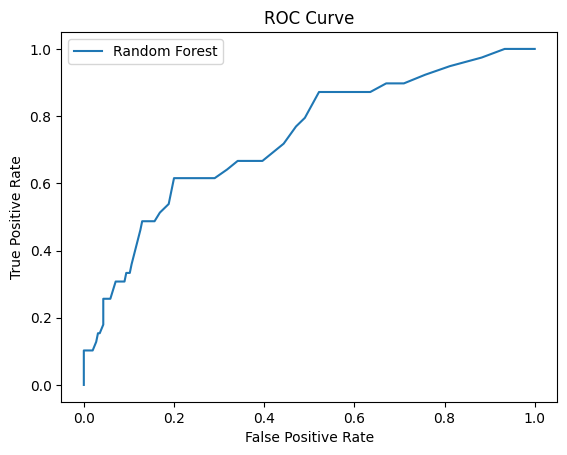

In [17]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Convert categorical labels in y_test to numeric
y_test_numeric = y_test.replace({'No': 0, 'Yes': 1})

# Convert categorical labels in y_pred_rf (NumPy array) to numeric
y_pred_rf_numeric = np.where(y_pred_rf == 'No', 0, 1)

# ROC-AUC score
roc_auc_rf = roc_auc_score(y_test_numeric, y_pred_rf_numeric)
print(f"ROC-AUC Score (Random Forest): {roc_auc_rf}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_numeric, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()




imbalanced data handling


In [19]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train the model on resampled data
clf.fit(X_res, y_res)


RandomForestClassifier(random_state=42)

Ensemble methods combine predictions from multiple models to improve the overall accuracy and robustness of the predictions

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define base models for stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on test set
y_pred_stack = stacking_model.predict(X_test)

# Evaluate performance
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Model Accuracy: {accuracy_stack:.2f}")


Stacking Model Accuracy: 0.87


Automated Hyperparameter

In [29]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [31]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1f5fbdb7a0b81543db244d377580d8f7c6fa12a10a72515a2834c9ee4f6a4fdb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.30217285099933
Prediction_local [0.43034767]
Right: 0.26


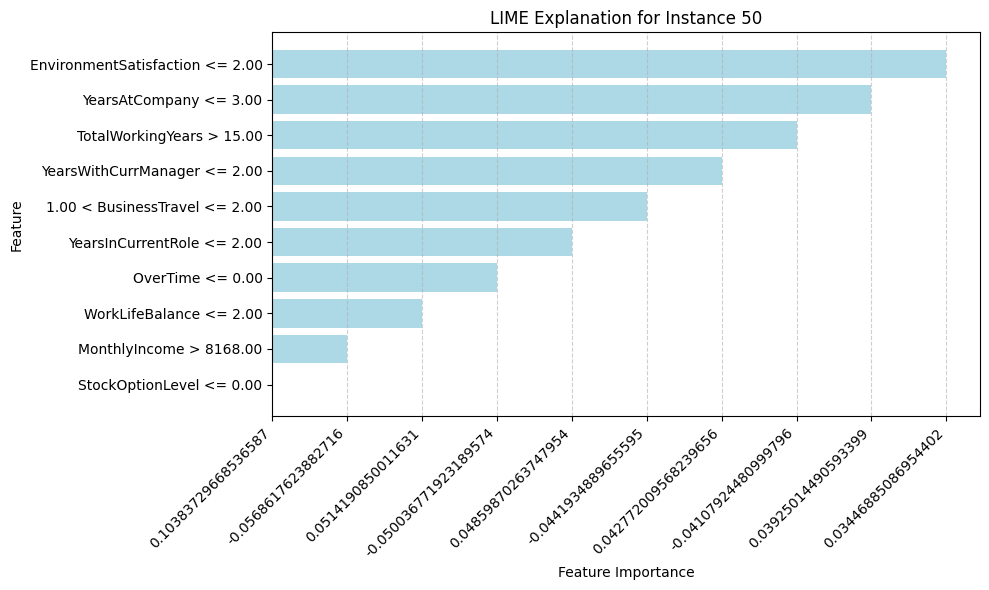

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.3672363499278434
Prediction_local [0.29104214]
Right: 0.34


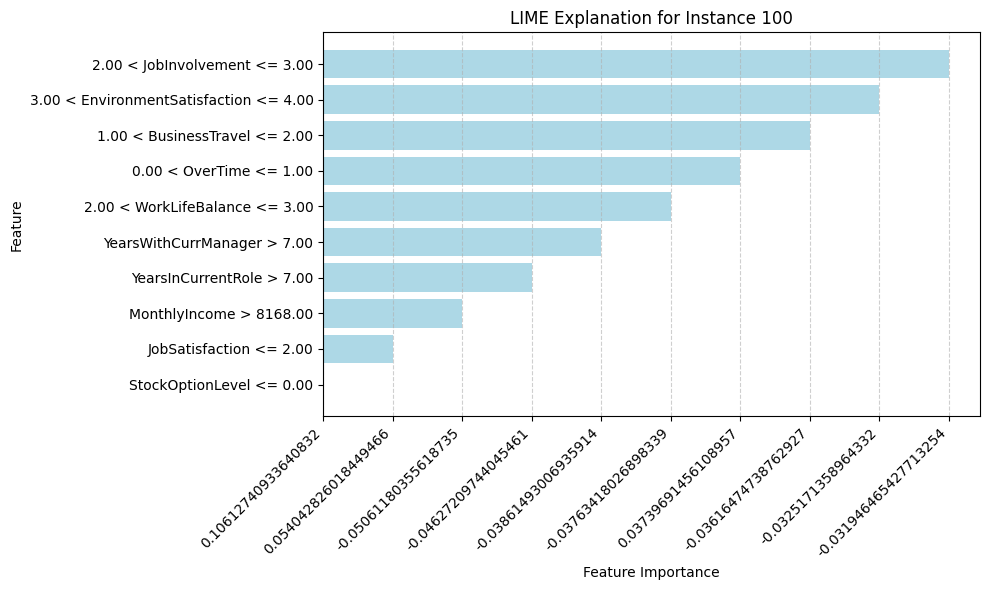

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.4479074896341044
Prediction_local [0.17498571]
Right: 0.07


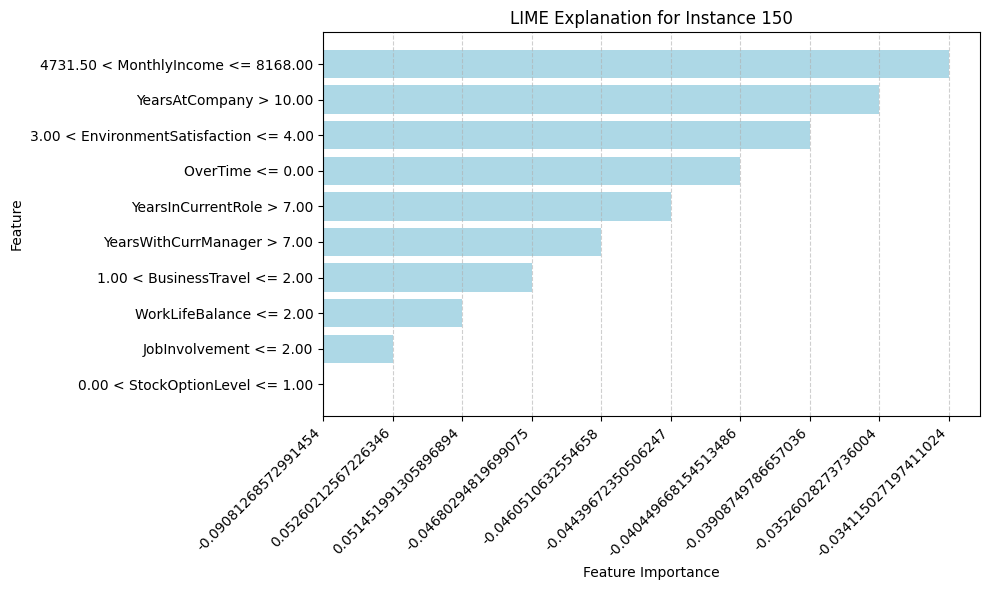

In [42]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# Initialize the LIME explainer with additional parameters
explainer = LimeTabularExplainer(
    X_train.values,  # Training data for explanation
    feature_names=features,  # List of feature names
    class_names=['Stay', 'Leave'],  # Class names for binary classification
    mode='classification',  # Classification mode
    kernel_width=25,  # Defines the width of the kernel used for local approximation
    verbose=True,  # For debugging information
    random_state=42  # Ensures reproducibility
)

# Function to explain multiple instances and plot bar charts
def explain_multiple_instances_as_barcharts(indices):
    for idx in indices:
        # Explain instance at index idx
        exp = explainer.explain_instance(X_test.iloc[idx].values, clf.predict_proba)

        # Extract feature names and their corresponding weights (importances)
        feature_importances = np.array(exp.as_list())
        features_explained = [x[0] for x in feature_importances]
        importances = [x[1] for x in feature_importances]

        # Create a bar chart for the explanation
        plt.figure(figsize=(10, 6))
        plt.barh(features_explained, importances, color='lightblue')

        # Adjusting the axis labels for better visibility
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title(f'LIME Explanation for Instance {idx}')

        # Rotate x-axis labels for better visibility if necessary
        plt.xticks(rotation=45, ha='right')

        # Add grid lines for better readability
        plt.grid(True, axis='x', linestyle='--', alpha=0.6)

        # Show the plot
        plt.tight_layout()  # Adjust layout to ensure proper spacing
        plt.show()

# Choose multiple instances (e.g., indices 50, 100, 150) to explain
indices_to_explain = [50, 100, 150]  # Ensure these are within bounds (0 to 293)

# Explain the selected instances and plot the bar charts
explain_multiple_instances_as_barcharts(indices_to_explain)
